<a href="https://colab.research.google.com/github/AbhinavRao23/MNIST/blob/master/MNIST_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import for ANN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

#import for CNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

#import for understanding model
from tensorflow.keras.models import Model

#Seeding shufflers
np.random.seed(0)

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#Reshaping samples ad labels
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [4]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape = (28,28,1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(15, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [5]:
model = leNet_model()

In [6]:
%%time
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle =1)

Epoch 1/10
135/135 [==============================] - 1s 7ms/step - loss: 2.3360 - accuracy: 0.6147 - val_loss: 0.3717 - val_accuracy: 0.8827
Epoch 2/10
135/135 [==============================] - 1s 5ms/step - loss: 0.4223 - accuracy: 0.8749 - val_loss: 0.1959 - val_accuracy: 0.9427
Epoch 3/10
135/135 [==============================] - 1s 5ms/step - loss: 0.3491 - accuracy: 0.8975 - val_loss: 0.1696 - val_accuracy: 0.9465
Epoch 4/10
135/135 [==============================] - 1s 5ms/step - loss: 0.3024 - accuracy: 0.9108 - val_loss: 0.1606 - val_accuracy: 0.9482
Epoch 5/10
135/135 [==============================] - 1s 5ms/step - loss: 0.2818 - accuracy: 0.9167 - val_loss: 0.1572 - val_accuracy: 0.9513
Epoch 6/10
135/135 [==============================] - 1s 5ms/step - loss: 0.2604 - accuracy: 0.9230 - val_loss: 0.1330 - val_accuracy: 0.9597
Epoch 7/10
135/135 [==============================] - 1s 5ms/step - loss: 0.2301 - accuracy: 0.9311 - val_loss: 0.1413 - val_accuracy: 0.9597
Epoch 

Text(0.5, 1.0, 'Loss')

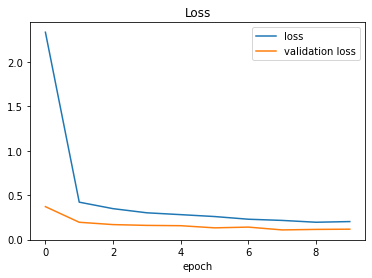

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])
plt.xlabel('epoch')
plt.title('Loss')

Text(0.5, 1.0, 'accuracy')

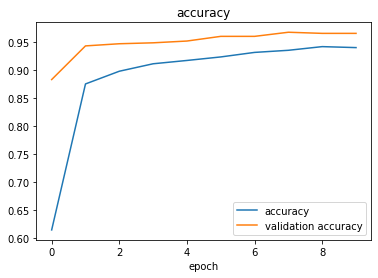

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])
plt.xlabel('epoch')
plt.title('accuracy')

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.12749099731445312
Test accuracy: 0.9634000062942505


In [10]:
import requests
from PIL import Image
import cv2

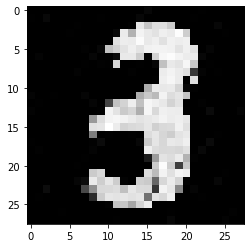

In [11]:
url = 'https://st.depositphotos.com/2899123/3753/v/950/depositphotos_37531893-stock-illustration-3-black-handwritten-number-on.jpg'

r = requests.get(url, stream = True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [12]:
img = img.reshape(1,28,28,1)
print(model.predict_classes(img))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[3]


In [13]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

In [14]:
visual_layer_1, visual_layer_2 = layer1(img),layer2(img)

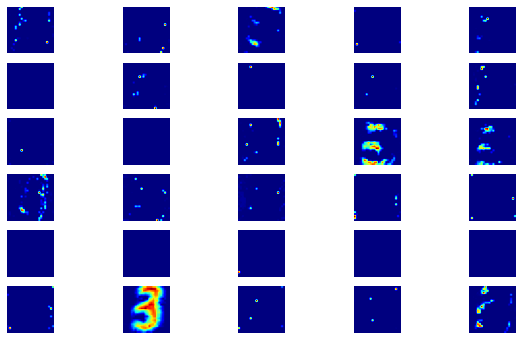

In [15]:
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer_1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

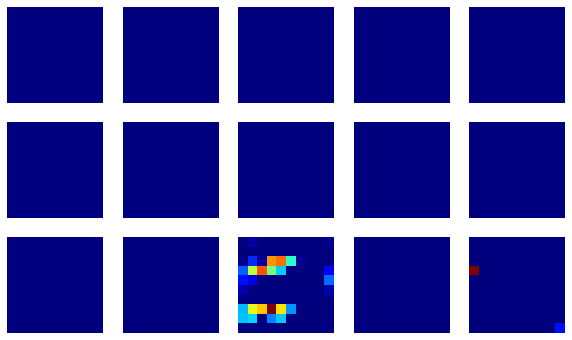

In [16]:
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer_2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')